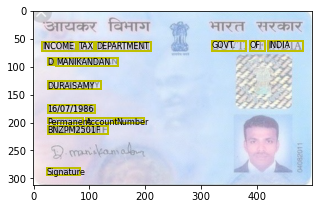

(0.0, 1.0, 0.0, 1.0)

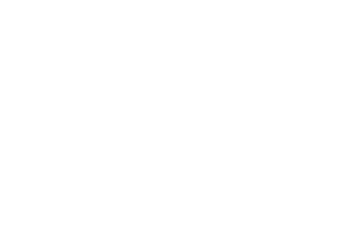

In [3]:
import os
import sys
import requests

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image
from io import BytesIO

if 'COMPUTER_VISION_SUBSCRIPTION_KEY' in os.environ:
    subscription_key = os.environ.get('COMPUTER_VISION_SUBSCRIPTION_KEY')
else:
    print("\nSet the COMPUTER_VISION_SUBSCRIPTION_KEY environment variable.\n**Restart your shell or IDE for changes to take effect.**")
    sys.exit()


if 'COMPUTER_VISION_ENDPOINT' in os.environ:
    endpoint = os.environ.get('COMPUTER_VISION_ENDPOINT')

ocr_url = endpoint + "vision/v3.1/ocr"

image_path = r"D:\pancard1.jpg"
# Read the image into a byte array
image_data = open(image_path, "rb").read()

headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
params = {'language': 'unk', 'detectOrientation': 'true'}
response = requests.post(ocr_url, headers=headers, params=params, data = image_data)

analysis = response.json()
#print(analysis)

# Extract the word bounding boxes and text.
line_infos = [region["lines"] for region in analysis["regions"]]
word_infos = []
for line in line_infos:
    for word_metadata in line:
        for word_info in word_metadata["words"]:
            word_infos.append(word_info)
word_infos

# Display the image and overlay it with the extracted text.
plt.figure(figsize=(5, 5))
#image = Image.open(BytesIO(requests.get(image_url).content))
image = Image.open(image_path)
ax = plt.imshow(image, alpha=0.5)
for word in word_infos:
    bbox = [int(num) for num in word["boundingBox"].split(",")]
    text = word["text"]
    origin = (bbox[0], bbox[1])
    patch = Rectangle(origin, bbox[2], bbox[3],
                      fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(origin[0], origin[1], text, fontsize=8, va="top")
plt.show()
plt.axis("off")
